In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 1], [1, 0, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54462 stdev: 0.15366
Best fitness: 0.78850 - size: (2, 13) - species 2 - id 153
Average adjusted fitness: 0.349
Mean genetic distance 2.861, standard deviation 0.465
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.206 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61048 stdev: 0.14422
Best fitness: 0.79777 - size: (3, 14) - species 7 - id 271
Average adjusted fitness: 0.336
Mean genetic distance 2.925, standard deviation 0.471
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 5.898 sec (6.052 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62266 stdev: 0.14466
Best fitness: 0.79777 - size: (3, 14) - species 7 - id 271
Average adjusted fitness: 0.350
Mean genetic distance 2.992, standard deviation 0.485
Population of 202 members in 30 species
Total extincti

Population's average fitness: 0.69909 stdev: 0.11351
Best fitness: 0.82870 - size: (4, 19) - species 2 - id 3184
Average adjusted fitness: 0.399
Mean genetic distance 3.273, standard deviation 0.499
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.810 sec (8.490 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69290 stdev: 0.12522
Best fitness: 0.82870 - size: (4, 19) - species 2 - id 3184
Average adjusted fitness: 0.390
Mean genetic distance 3.291, standard deviation 0.513
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.018 sec (8.185 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69442 stdev: 0.11837
Best fitness: 0.82870 - size: (4, 19) - species 47 - id 3184
Average adjusted fitness: 0.391
Mean genetic distance 3.269, standard deviation 0.509
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 9.831 sec (8.361 average)

 ****** R

Population's average fitness: 0.69609 stdev: 0.10894
Best fitness: 0.85591 - size: (7, 21) - species 49 - id 6867
Average adjusted fitness: 0.395
Mean genetic distance 3.239, standard deviation 0.566
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 9.328 sec (9.701 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.67706 stdev: 0.13765
Best fitness: 0.85591 - size: (7, 21) - species 49 - id 6867
Average adjusted fitness: 0.386
Mean genetic distance 3.209, standard deviation 0.567
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 9.040 sec (9.782 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.68951 stdev: 0.13288
Best fitness: 0.85591 - size: (7, 21) - species 49 - id 6867
Average adjusted fitness: 0.366
Mean genetic distance 3.205, standard deviation 0.564
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 9.195 sec (9.848 average)

 ******

Population's average fitness: 0.69739 stdev: 0.13293
Best fitness: 0.87570 - size: (9, 24) - species 52 - id 10147
Average adjusted fitness: 0.460
Mean genetic distance 3.291, standard deviation 0.602
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.162 sec (9.014 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.70418 stdev: 0.11725
Best fitness: 0.87570 - size: (9, 24) - species 52 - id 10147
Average adjusted fitness: 0.404
Mean genetic distance 3.267, standard deviation 0.612
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.676 sec (9.113 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69397 stdev: 0.12426
Best fitness: 0.87570 - size: (9, 24) - species 52 - id 10147
Average adjusted fitness: 0.441
Mean genetic distance 3.278, standard deviation 0.607
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 9.581 sec (9.204 average)

 ***

Population's average fitness: 0.69948 stdev: 0.12518
Best fitness: 0.87755 - size: (9, 30) - species 80 - id 12447
Average adjusted fitness: 0.397
Mean genetic distance 3.144, standard deviation 0.579
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 11.196 sec (11.103 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.68350 stdev: 0.14423
Best fitness: 0.87755 - size: (9, 30) - species 80 - id 12447
Average adjusted fitness: 0.385
Mean genetic distance 3.165, standard deviation 0.583
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 11.029 sec (11.137 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.67589 stdev: 0.15175
Best fitness: 0.87755 - size: (9, 30) - species 80 - id 12447
Average adjusted fitness: 0.398
Mean genetic distance 3.175, standard deviation 0.578
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 11.063 sec (11.155 average)

Population's average fitness: 0.72008 stdev: 0.10850
Best fitness: 0.87755 - size: (9, 30) - species 80 - id 12447
Average adjusted fitness: 0.418
Mean genetic distance 2.987, standard deviation 0.543
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 11.555 sec (12.255 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.71681 stdev: 0.12362
Best fitness: 0.87755 - size: (9, 30) - species 80 - id 12447
Average adjusted fitness: 0.447
Mean genetic distance 3.003, standard deviation 0.535
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 11.649 sec (12.207 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.70048 stdev: 0.13231
Best fitness: 0.87755 - size: (9, 30) - species 80 - id 12447
Average adjusted fitness: 0.431
Mean genetic distance 3.018, standard deviation 0.533
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 14.159 sec (12.453 averag

Population's average fitness: 0.70836 stdev: 0.13574
Best fitness: 0.87817 - size: (10, 27) - species 103 - id 22851
Average adjusted fitness: 0.427
Mean genetic distance 2.981, standard deviation 0.579
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.439 sec (12.258 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.70476 stdev: 0.13036
Best fitness: 0.87817 - size: (10, 27) - species 103 - id 22851
Average adjusted fitness: 0.407
Mean genetic distance 2.993, standard deviation 0.546
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 11.376 sec (12.196 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.71868 stdev: 0.12959
Best fitness: 0.87817 - size: (10, 27) - species 103 - id 22851
Average adjusted fitness: 0.405
Mean genetic distance 2.982, standard deviation 0.546
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 11.803 sec (12.093 

Population's average fitness: 0.62406 stdev: 0.08370
Best fitness: 0.77860 - size: (3, 15) - species 28 - id 938
Average adjusted fitness: 0.216
Mean genetic distance 3.235, standard deviation 0.470
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.060 sec (7.157 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62855 stdev: 0.08349
Best fitness: 0.77860 - size: (3, 15) - species 28 - id 938
Average adjusted fitness: 0.204
Mean genetic distance 3.229, standard deviation 0.469
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 7.338 sec (7.200 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61792 stdev: 0.09106
Best fitness: 0.77860 - size: (3, 15) - species 28 - id 938
Average adjusted fitness: 0.217
Mean genetic distance 3.223, standard deviation 0.481
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.568 sec (7.237 average)

 ****** Ru

Population's average fitness: 0.63589 stdev: 0.09647
Best fitness: 0.80705 - size: (5, 18) - species 28 - id 5445
Average adjusted fitness: 0.277
Mean genetic distance 3.174, standard deviation 0.548
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 8.386 sec (8.178 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.63646 stdev: 0.09088
Best fitness: 0.80705 - size: (5, 18) - species 28 - id 5445
Average adjusted fitness: 0.213
Mean genetic distance 3.161, standard deviation 0.554
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.982 sec (8.162 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.63848 stdev: 0.08854
Best fitness: 0.80705 - size: (5, 18) - species 28 - id 5445
Average adjusted fitness: 0.208
Mean genetic distance 3.128, standard deviation 0.549
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 8.106 sec (8.196 average)

 ******

Mean genetic distance 3.279, standard deviation 0.593
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.643 sec (9.340 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.62588 stdev: 0.09530
Best fitness: 0.80705 - size: (5, 18) - species 28 - id 5445
Average adjusted fitness: 0.186
Mean genetic distance 3.258, standard deviation 0.596
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.750 sec (9.446 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62574 stdev: 0.09961
Best fitness: 0.80705 - size: (5, 18) - species 28 - id 5445
Average adjusted fitness: 0.243
Mean genetic distance 3.281, standard deviation 0.593
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.458 sec (9.456 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63796 stdev: 0.09477
Best fitness: 0.80705 - size: (5, 18) - species 28 - id 5445


Mean genetic distance 3.103, standard deviation 0.585
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.677 sec (10.473 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64402 stdev: 0.10273
Best fitness: 0.83735 - size: (7, 22) - species 67 - id 12213
Average adjusted fitness: 0.217
Mean genetic distance 3.049, standard deviation 0.589
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.659 sec (10.481 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.64246 stdev: 0.09823
Best fitness: 0.83735 - size: (7, 22) - species 67 - id 12213
Average adjusted fitness: 0.298
Mean genetic distance 2.962, standard deviation 0.605
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 10.309 sec (10.470 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.63833 stdev: 0.10468
Best fitness: 0.83735 - size: (7, 22) - species 67 - 

Population's average fitness: 0.64860 stdev: 0.10383
Best fitness: 0.83735 - size: (7, 22) - species 67 - id 12213
Average adjusted fitness: 0.292
Mean genetic distance 2.902, standard deviation 0.531
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.221 sec (10.946 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.63763 stdev: 0.10350
Best fitness: 0.83735 - size: (7, 22) - species 67 - id 12213
Average adjusted fitness: 0.196
Mean genetic distance 2.895, standard deviation 0.516
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 11.166 sec (10.946 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.63504 stdev: 0.10940
Best fitness: 0.83735 - size: (7, 22) - species 67 - id 12213
Average adjusted fitness: 0.286
Mean genetic distance 2.849, standard deviation 0.539
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 10.836 sec (10.936 averag

Population's average fitness: 0.65469 stdev: 0.10040
Best fitness: 0.84910 - size: (9, 25) - species 69 - id 17847
Average adjusted fitness: 0.195
Mean genetic distance 2.921, standard deviation 0.486
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 11.725 sec (11.633 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.65453 stdev: 0.10756
Best fitness: 0.84910 - size: (9, 25) - species 69 - id 17847
Average adjusted fitness: 0.350
Mean genetic distance 2.917, standard deviation 0.488
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.256 sec (11.585 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.65381 stdev: 0.10185
Best fitness: 0.84910 - size: (9, 25) - species 69 - id 17847
Average adjusted fitness: 0.215
Mean genetic distance 2.910, standard deviation 0.506
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 11.549 sec (11.558 averag

Population's average fitness: 0.59971 stdev: 0.08445
Best fitness: 0.73779 - size: (4, 16) - species 27 - id 1158
Average adjusted fitness: 0.254
Mean genetic distance 3.103, standard deviation 0.493
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.259 sec (6.984 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60550 stdev: 0.08531
Best fitness: 0.73779 - size: (4, 16) - species 27 - id 1158
Average adjusted fitness: 0.226
Mean genetic distance 3.105, standard deviation 0.497
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.136 sec (7.061 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59282 stdev: 0.09651
Best fitness: 0.73779 - size: (4, 16) - species 27 - id 1158
Average adjusted fitness: 0.228
Mean genetic distance 3.104, standard deviation 0.488
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 7.218 sec (7.150 average)

 ******

Population's average fitness: 0.62955 stdev: 0.09072
Best fitness: 0.75943 - size: (9, 27) - species 43 - id 4745
Average adjusted fitness: 0.231
Mean genetic distance 3.217, standard deviation 0.489
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.081 sec (7.913 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.61721 stdev: 0.10243
Best fitness: 0.75943 - size: (9, 27) - species 43 - id 4745
Average adjusted fitness: 0.252
Mean genetic distance 3.208, standard deviation 0.493
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 8.211 sec (7.981 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61331 stdev: 0.09944
Best fitness: 0.76190 - size: (10, 26) - species 43 - id 5175
Average adjusted fitness: 0.217
Mean genetic distance 3.185, standard deviation 0.526
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 7.889 sec (7.990 average)

 *****

Population's average fitness: 0.63788 stdev: 0.08803
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.241
Mean genetic distance 3.256, standard deviation 0.603
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 9.142 sec (9.788 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.63486 stdev: 0.09344
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.237
Mean genetic distance 3.214, standard deviation 0.601
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 8.845 sec (9.672 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61236 stdev: 0.10639
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.228
Mean genetic distance 3.214, standard deviation 0.594
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 9.454 sec (9.592 average)

 ***

Population's average fitness: 0.60602 stdev: 0.09779
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.258
Mean genetic distance 3.046, standard deviation 0.564
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.869 sec (12.700 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.60562 stdev: 0.09147
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.253
Mean genetic distance 3.018, standard deviation 0.552
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 12.265 sec (12.446 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.59190 stdev: 0.10488
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.266
Mean genetic distance 3.025, standard deviation 0.542
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 12.295 sec (12.457 average)

Population's average fitness: 0.61554 stdev: 0.11227
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.221
Mean genetic distance 3.171, standard deviation 0.562
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 13.634 sec (12.219 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.62104 stdev: 0.10497
Best fitness: 0.78169 - size: (10, 27) - species 43 - id 6468
Average adjusted fitness: 0.233
Mean genetic distance 3.163, standard deviation 0.562
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 11.159 sec (12.268 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.62141 stdev: 0.10858
Best fitness: 0.78231 - size: (15, 37) - species 59 - id 17247
Average adjusted fitness: 0.225
Mean genetic distance 3.208, standard deviation 0.565
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 11.170 sec (12.311 avera

Population's average fitness: 0.60893 stdev: 0.11144
Best fitness: 0.78417 - size: (21, 52) - species 69 - id 18711
Average adjusted fitness: 0.241
Mean genetic distance 3.071, standard deviation 0.590
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.684 sec (13.777 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.59847 stdev: 0.11290
Best fitness: 0.78417 - size: (21, 52) - species 69 - id 18711
Average adjusted fitness: 0.247
Mean genetic distance 3.072, standard deviation 0.618
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 12.550 sec (13.743 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.61186 stdev: 0.10961
Best fitness: 0.78417 - size: (21, 52) - species 69 - id 18711
Average adjusted fitness: 0.240
Mean genetic distance 3.066, standard deviation 0.606
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 12.279 sec (13.634 ave

Mean genetic distance 3.081, standard deviation 0.497
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.478 sec (7.796 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58649 stdev: 0.08262
Best fitness: 0.78788 - size: (4, 20) - species 29 - id 951
Average adjusted fitness: 0.237
Mean genetic distance 3.137, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.053 sec (7.690 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58510 stdev: 0.08801
Best fitness: 0.78788 - size: (4, 20) - species 29 - id 951
Average adjusted fitness: 0.207
Mean genetic distance 3.162, standard deviation 0.489
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.424 sec (7.657 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59492 stdev: 0.08451
Best fitness: 0.78788 - size: (4, 20) - species 29 - id 951
Averag

Mean genetic distance 3.218, standard deviation 0.504
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.940 sec (8.152 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62089 stdev: 0.09368
Best fitness: 0.79468 - size: (4, 20) - species 29 - id 3462
Average adjusted fitness: 0.219
Mean genetic distance 3.216, standard deviation 0.506
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.421 sec (8.137 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61731 stdev: 0.10095
Best fitness: 0.79468 - size: (4, 20) - species 29 - id 3462
Average adjusted fitness: 0.236
Mean genetic distance 3.227, standard deviation 0.508
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 9.011 sec (8.226 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62290 stdev: 0.09400
Best fitness: 0.79468 - size: (4, 20) - species 29 - id 3462


Mean genetic distance 3.240, standard deviation 0.548
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.158 sec (9.486 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.62586 stdev: 0.10278
Best fitness: 0.79468 - size: (4, 20) - species 29 - id 3462
Average adjusted fitness: 0.236
Mean genetic distance 3.260, standard deviation 0.582
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.014 sec (9.615 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64065 stdev: 0.09064
Best fitness: 0.79468 - size: (4, 20) - species 29 - id 3462
Average adjusted fitness: 0.254
Mean genetic distance 3.272, standard deviation 0.574
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.176 sec (9.631 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.62763 stdev: 0.10948
Best fitness: 0.79468 - size: (4, 20) - species 29 - id 346

Mean genetic distance 3.255, standard deviation 0.602
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 10.339 sec (9.841 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.63688 stdev: 0.09718
Best fitness: 0.80829 - size: (5, 22) - species 29 - id 9762
Average adjusted fitness: 0.273
Mean genetic distance 3.260, standard deviation 0.616
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 10.004 sec (9.958 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.63048 stdev: 0.10267
Best fitness: 0.80829 - size: (5, 22) - species 29 - id 9762
Average adjusted fitness: 0.313
Mean genetic distance 3.255, standard deviation 0.619
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.582 sec (9.733 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.63212 stdev: 0.09793
Best fitness: 0.80829 - size: (5, 22) - species 29 - id 97

Mean genetic distance 3.185, standard deviation 0.563
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.831 sec (10.345 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.61500 stdev: 0.11649
Best fitness: 0.80829 - size: (5, 22) - species 29 - id 9762
Average adjusted fitness: 0.315
Mean genetic distance 3.194, standard deviation 0.556
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.128 sec (10.328 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.63167 stdev: 0.11207
Best fitness: 0.80829 - size: (5, 22) - species 29 - id 9762
Average adjusted fitness: 0.275
Mean genetic distance 3.149, standard deviation 0.587
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 9.922 sec (10.343 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.61456 stdev: 0.12185
Best fitness: 0.80829 - size: (5, 22) - species 29 - 

Population's average fitness: 0.63224 stdev: 0.11087
Best fitness: 0.81509 - size: (8, 26) - species 73 - id 18954
Average adjusted fitness: 0.242
Mean genetic distance 2.995, standard deviation 0.516
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 10.543 sec (11.336 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.64181 stdev: 0.11157
Best fitness: 0.81509 - size: (8, 26) - species 73 - id 18954
Average adjusted fitness: 0.256
Mean genetic distance 3.001, standard deviation 0.527
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 10.405 sec (11.062 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.63673 stdev: 0.12045
Best fitness: 0.81509 - size: (8, 26) - species 73 - id 18954
Average adjusted fitness: 0.274
Mean genetic distance 2.973, standard deviation 0.530
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 11.376 sec (11.011 averag

Population's average fitness: 0.62832 stdev: 0.11148
Best fitness: 0.81571 - size: (10, 28) - species 80 - id 20673
Average adjusted fitness: 0.231
Mean genetic distance 2.881, standard deviation 0.481
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.488 sec (13.588 average)


In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.45555555555555555

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[13  0  0  0  1  1  3  4  0  0]
 [ 0 13  0  0  4  2  1  1  3  0]
 [ 0  0 11  0  1  0  0  2  2  1]
 [ 0  1  4  7  1  0  0  3  2  0]
 [ 2  0  0  0 12  1  0  2  0  0]
 [ 0  0  0  0  0  5  1  1  0 12]
 [ 0  0  0  0  0  3 12  3  2  1]
 [ 1  0  0  0  0  3  0  3  0  0]
 [ 0  5  1 11  0  1  1  0  5  3]
 [ 0  0  1  0  1  2  0  0  3  1]]


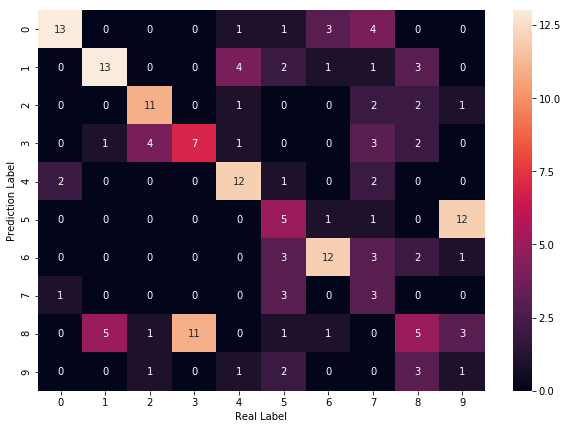

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[0 1 5] real:5
#1 min_error:0 index:[3] real:2
#2 min_error:0 index:[6] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[3] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[8] real:3
#8 min_error:1 index:[2 8 9] real:2
#9 min_error:1 index:[1 4] real:1
#10 min_error:0 index:[2] real:7
#11 min_error:1 index:[2 8 9] real:4
#12 min_error:0 index:[5] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[8] real:3
#16 min_error:0 index:[8] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[6] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[8] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:1 index:[0 4 7] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[1] real:6
#29 min_error:0 index:[6] real:9
#3

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5114409400123686
Avg Base Learner:0.831787260358689


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.05555555555555555
Accuracy on training set: 0.2111111111111111
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.3888888888888889


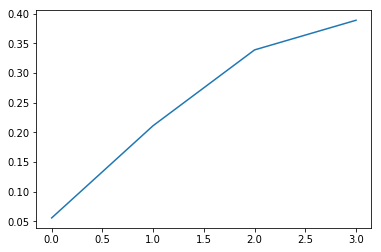

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.05555555555555555,
 0.2111111111111111,
 0.3388888888888889,
 0.3888888888888889]

In [17]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))

Number of nodes:25 Number of connections:46
Number of nodes:24 Number of connections:44
Number of nodes:39 Number of connections:135
Number of nodes:27 Number of connections:29
